In [1]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from sklearn.tree import export_graphviz
from sklearn import metrics
from sklearn import tree
from xgboost import plot_tree
import pandas as pd
import numpy as np
import os
import wget
from pathlib import Path
import shutil
import gzip
import joblib
import pydot
from matplotlib import pyplot as plt

random_state=42
np.random.seed(random_state)

In [2]:
df = pd.read_csv('dataset.csv', low_memory=False)

In [3]:
print(df.corr())

                           arp.opcode  arp.hw.size  icmp.checksum  \
arp.opcode                   1.000000     0.945420      -0.035867   
arp.hw.size                  0.945420     1.000000      -0.037938   
icmp.checksum               -0.035867    -0.037938       1.000000   
icmp.seq_le                 -0.030247    -0.031993       0.551757   
icmp.transmit_timestamp     -0.009252    -0.009786       0.174291   
icmp.unused                       NaN          NaN            NaN   
http.content_length         -0.019603    -0.020735      -0.047622   
http.response               -0.027549    -0.029139      -0.066924   
http.tls_port                     NaN          NaN            NaN   
tcp.ack                     -0.028674    -0.030330      -0.069658   
tcp.ack_raw                 -0.121998    -0.129042      -0.296371   
tcp.checksum                -0.139819    -0.147891      -0.339663   
tcp.connection.fin          -0.028801    -0.030464      -0.069967   
tcp.connection.rst          -0.040

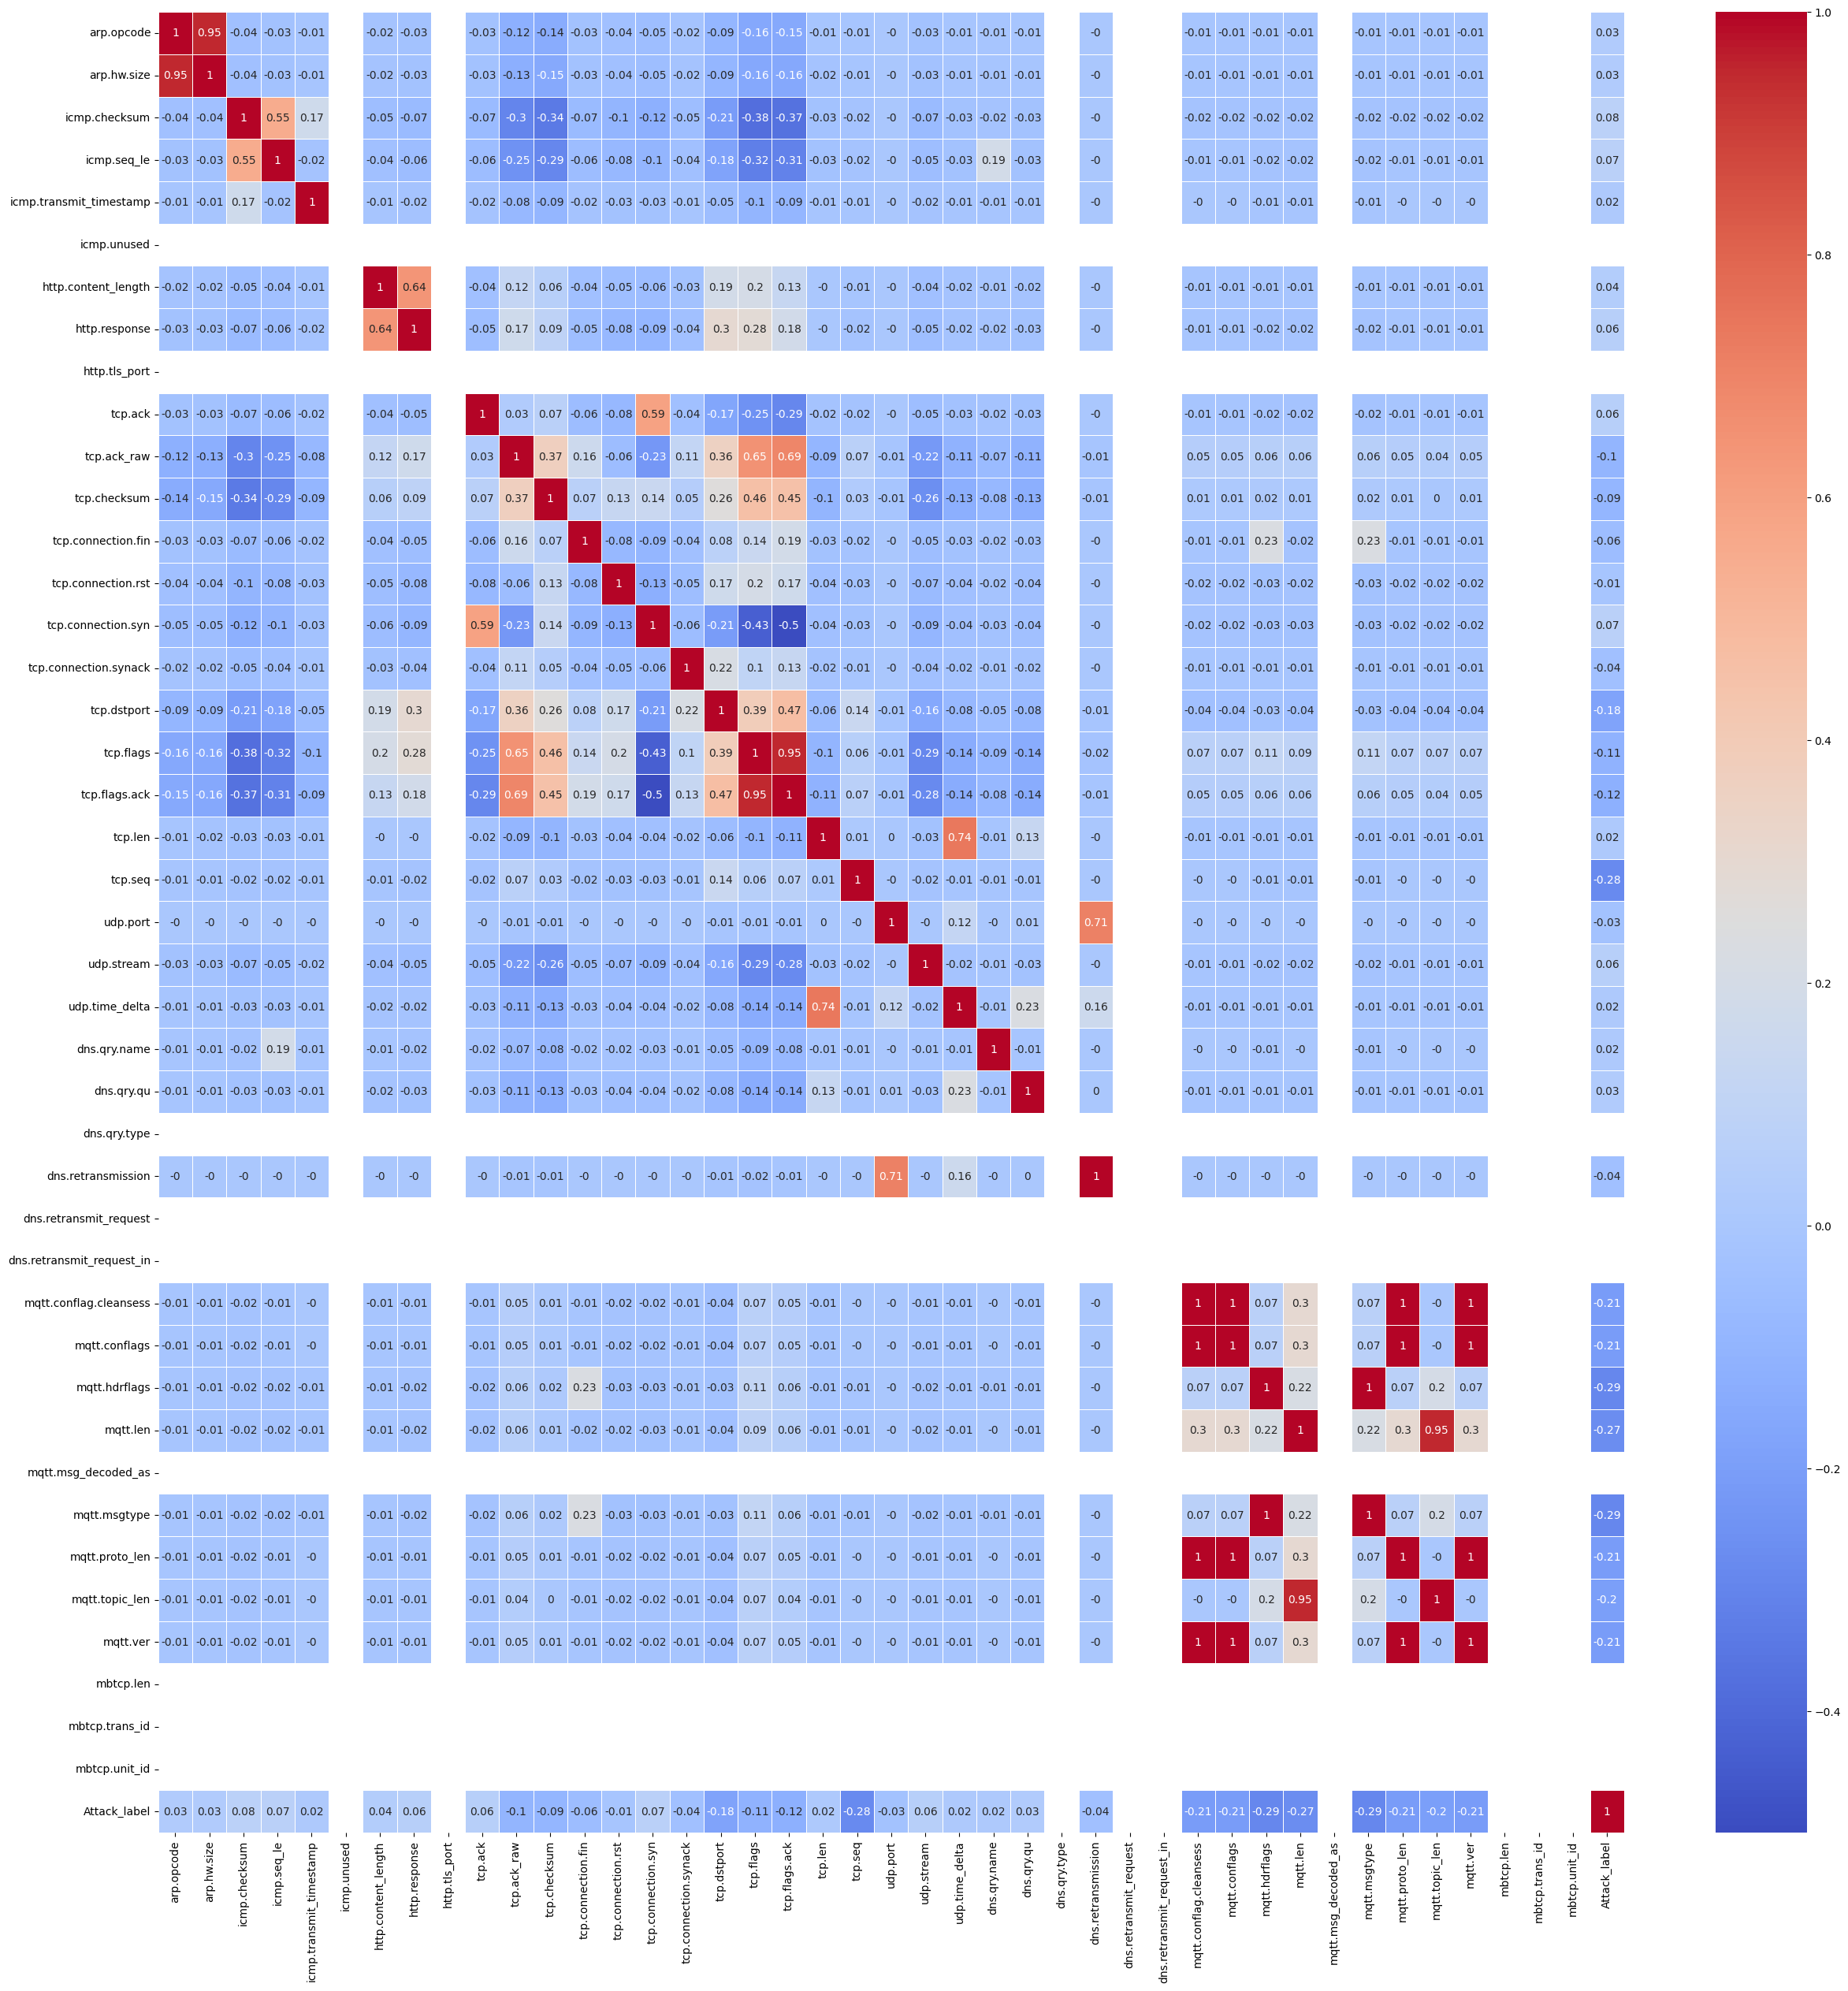

In [26]:
import seaborn as sns

plt.figure(figsize=(30, 30))
sns.heatmap(df.corr().round(2), annot=True, cmap='coolwarm', linewidths=.5)
#plt.savefig("correlation_heatmap.png", dpi=900, bbox_inches='tight')

plt.show()

In [10]:
corr_matrix = df.corr()

# round the correlation values to 2 decimal places
corr_matrix = corr_matrix.round(6)

# save the correlation matrix as a CSV file
corr_matrix.to_csv("correlation_matrix.csv", index=False)

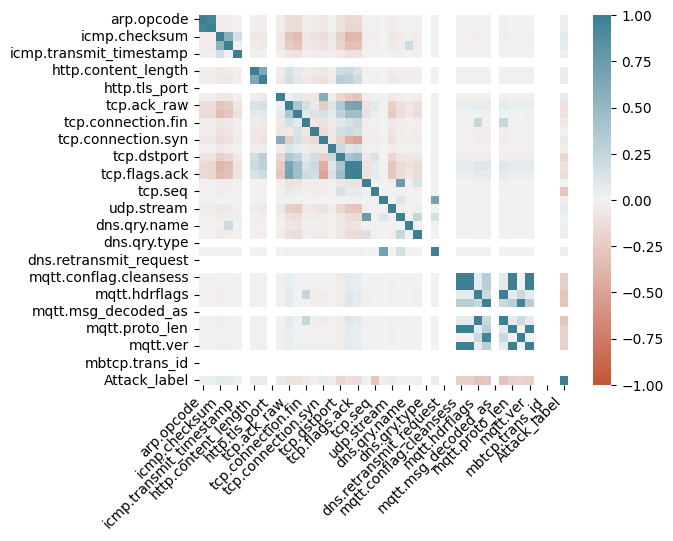

<Figure size 3000x3000 with 0 Axes>

In [25]:
ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    fmt='.2g',
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()
plt.figure(figsize=(30, 30))

plt.savefig("correlation_matrix.png", dpi=300, bbox_inches='tight')